
# **Prediction of Breast Cancer with Decision Tree**


In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from scipy.stats import beta
from scipy.stats import f

In [364]:
data = pd.read_csv('Breast_cancer_data.csv', index_col=False)
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [365]:
Y = data['diagnosis']
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [366]:
print(data['diagnosis'].value_counts()[0])
print(data['diagnosis'].value_counts()[1])

212
357


In [367]:
df = data.drop('diagnosis', axis=1)
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030


array([[<Axes: title={'center': 'mean_radius'}>,
        <Axes: title={'center': 'mean_texture'}>],
       [<Axes: title={'center': 'mean_perimeter'}>,
        <Axes: title={'center': 'mean_area'}>],
       [<Axes: title={'center': 'mean_smoothness'}>, <Axes: >]],
      dtype=object)

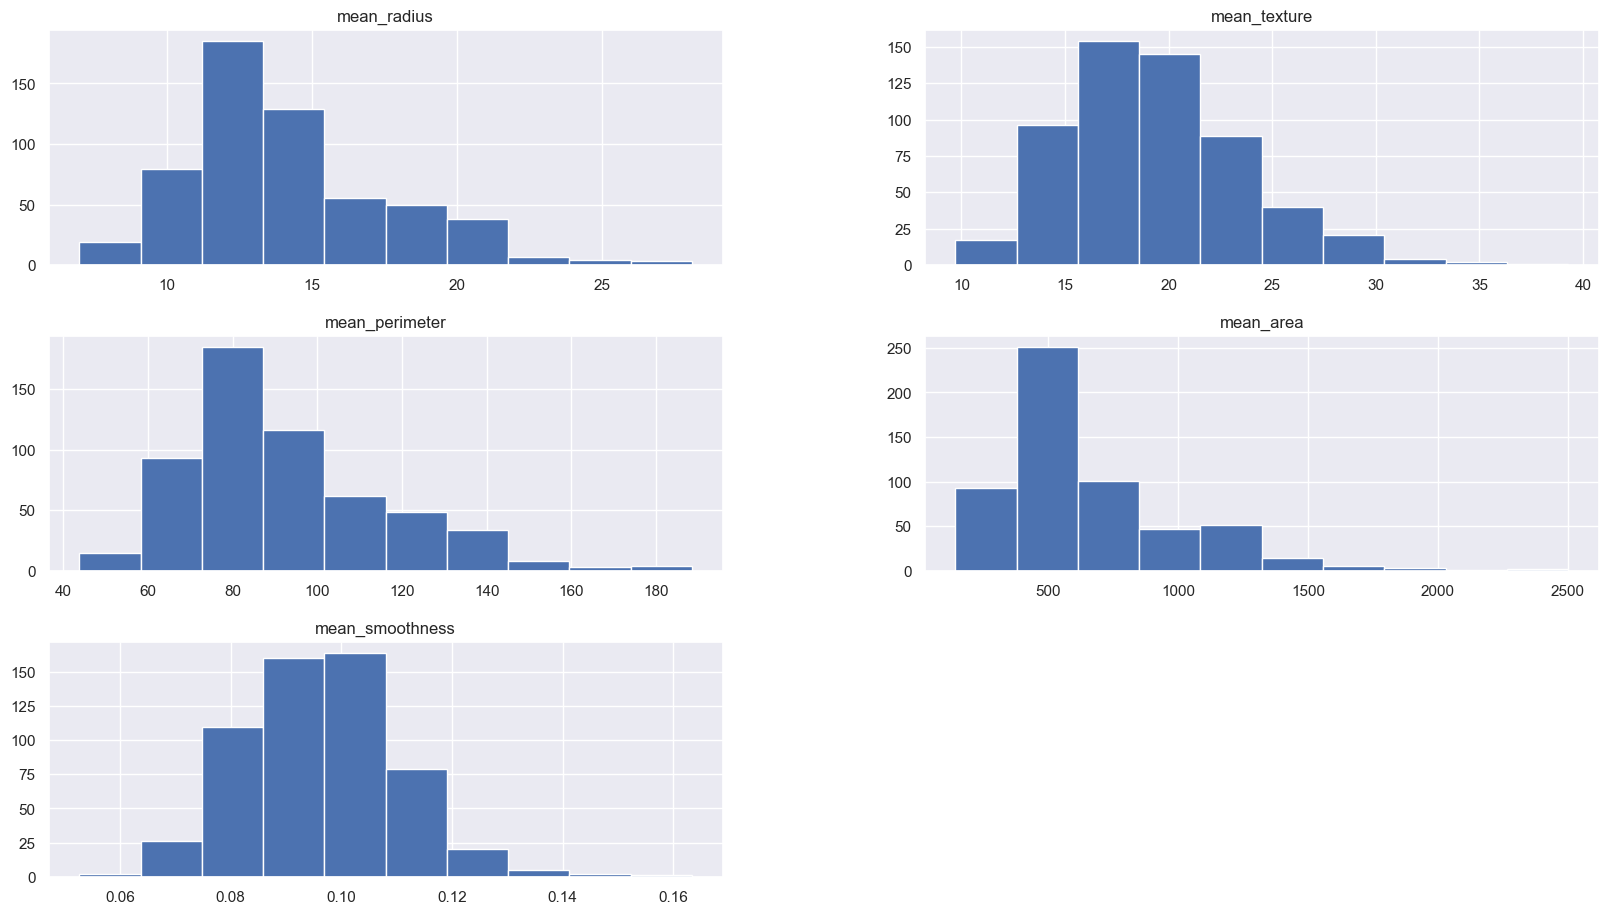

In [368]:
df.hist(figsize=(20,11))

In [369]:
#normalize data
df = (df - df.mean())/df.std()

In [370]:
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.096100,-2.071512,1.268817,0.983510,1.567087
1,1.828212,-0.353322,1.684473,1.907030,-0.826235
2,1.578499,0.455786,1.565126,1.557513,0.941382
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667
4,1.748758,-1.150804,1.775011,1.824624,0.280125
...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926
565,1.703356,2.083301,1.614511,1.722326,0.102368
566,0.701667,2.043775,0.672084,0.577445,-0.839745
567,1.836725,2.334403,1.980781,1.733693,1.524426


In [371]:
# Displaying DataFrame columns.
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')

In [372]:
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
dtypes: float64(5)
memory usage: 22.4 KB


In [373]:
Y=data["diagnosis"]

In [374]:
#observations and variables
observations = list(df.index)
variables = list(df.columns)

print(observations)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

[Text(0, 0, 'mean_radius'),
 Text(1, 0, 'mean_texture'),
 Text(2, 0, 'mean_perimeter'),
 Text(3, 0, 'mean_area'),
 Text(4, 0, 'mean_smoothness')]

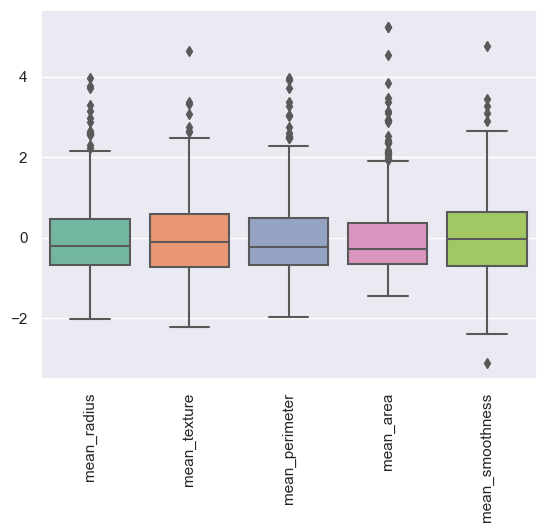

In [375]:
#visualisation of the data using a box plot
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


c:\Users\Nafi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Pairplot')

<Figure size 640x480 with 0 Axes>

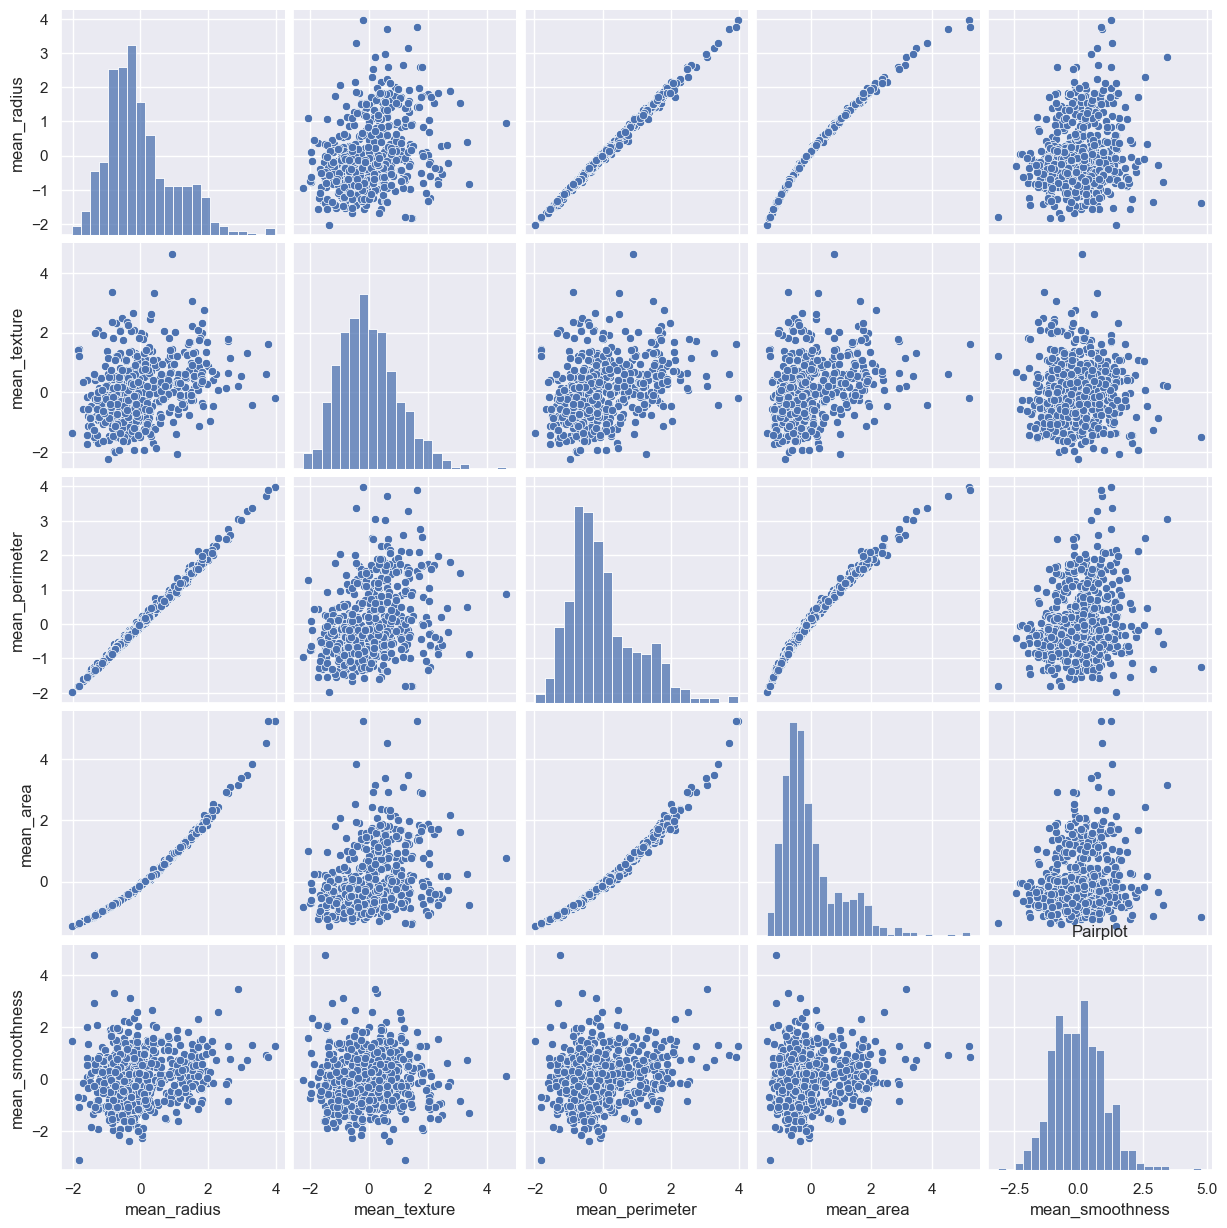

In [376]:
#pairplot
plt.figure()
sns.pairplot(df)
plt.title('Pairplot')

Text(0.5, 1.0, 'Covariance matrix')

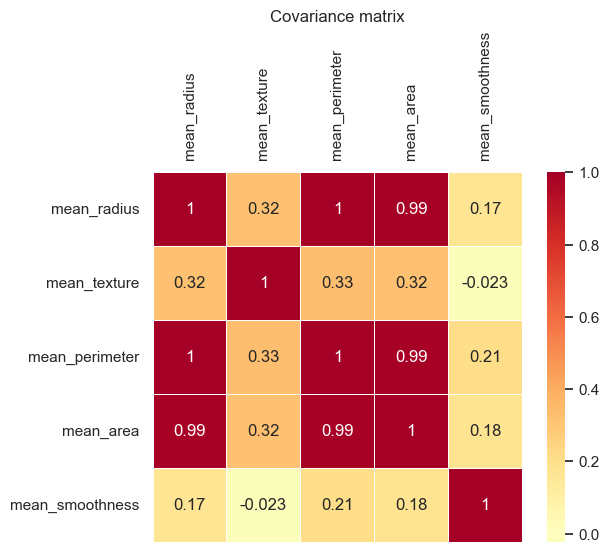

In [377]:
#Covariance
dfc = df - df.mean() #centered data
plt. figure()
ax = sns.heatmap(dfc.cov(), center=0,cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=True, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

Text(0, 0.5, '$Z_2$')

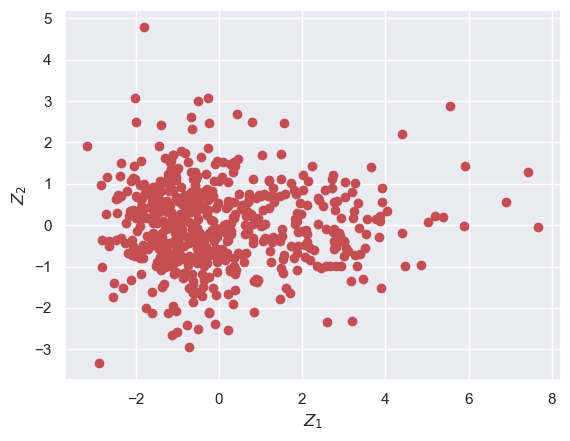

In [378]:
#Principal component analysis
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

plt. figure()
plt.scatter(Z[:,0], Z[:,1], c='r')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

c:\Users\Nafi\anaconda3\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

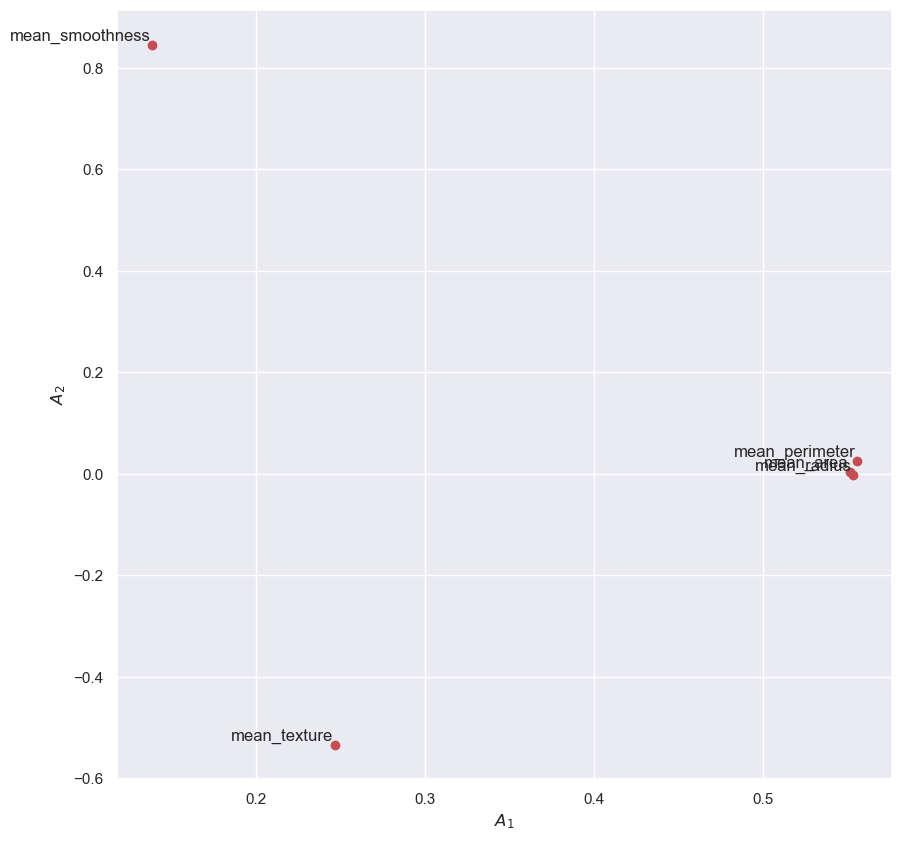

<Figure size 640x480 with 0 Axes>

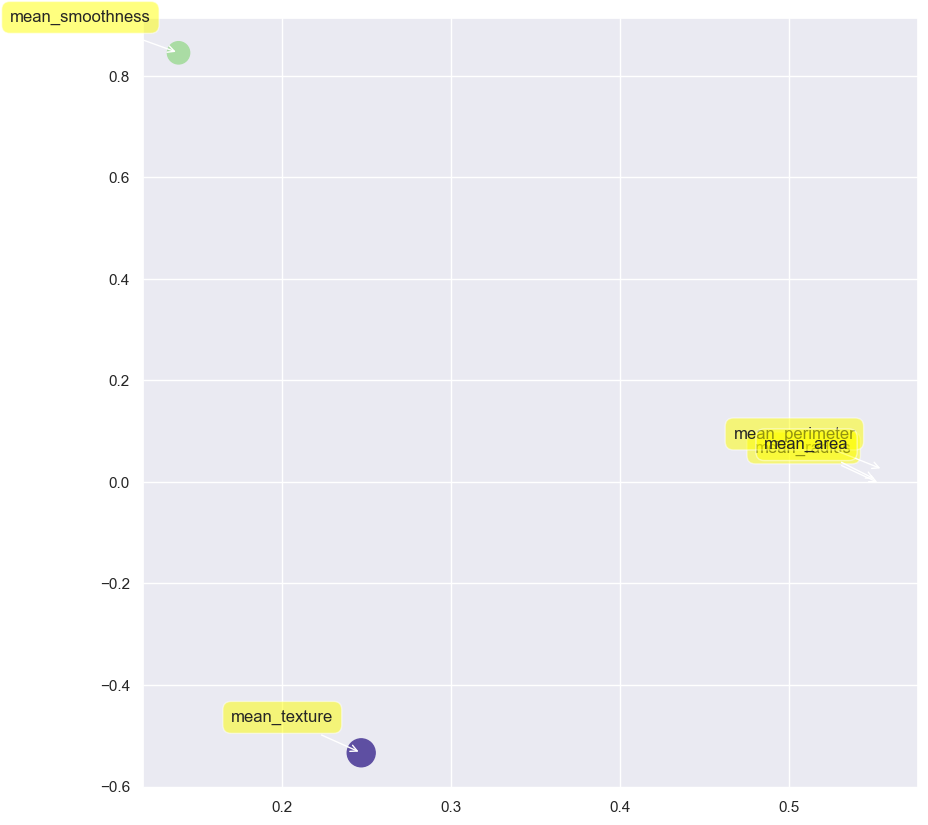

In [379]:
#Eigenvectors
A = pca.components_.T 
plt. figure()
plt.figure(figsize=(10,10))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$');
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom')

plt. figure()
plt.figure(figsize=(10,10))
plt.scatter(A[:, 0],A[:, 1],marker='o',c=A[:, 2],s=A[:, 2]*500,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


In [380]:
#Eigenvalues
Lambda = pca.explained_variance_

Text(0, 0.5, 'Explained variance')

<Figure size 640x480 with 0 Axes>

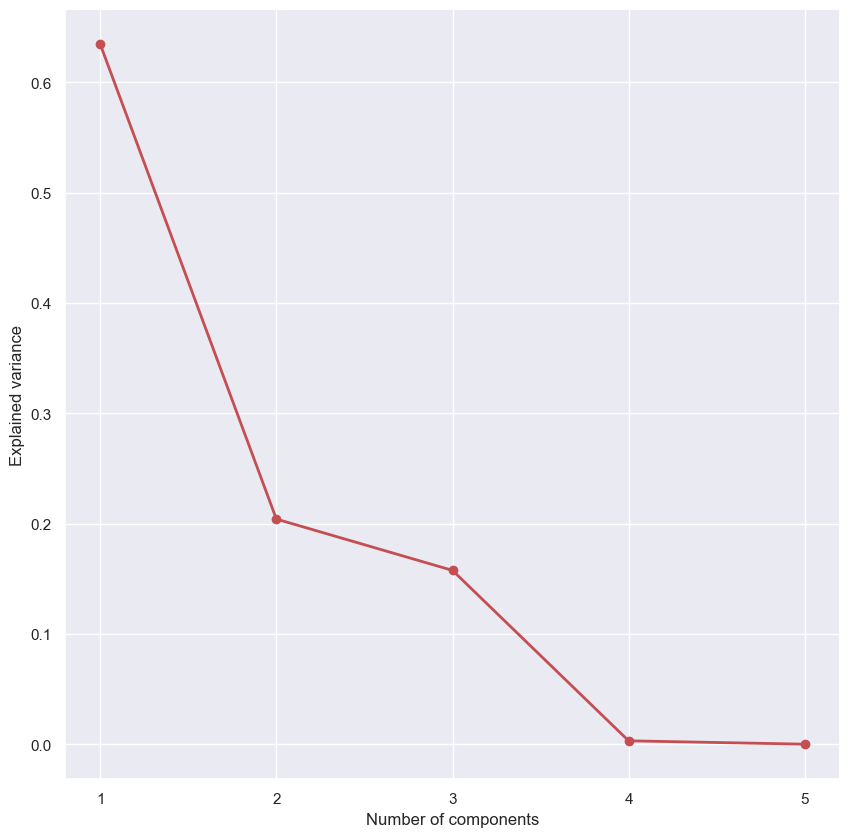

In [381]:
#Scree plot
plt. figure()
plt.figure(figsize=(10, 10))
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/Lambda.sum(), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [382]:
(Lambda[1]+Lambda[0])/Lambda.sum()

0.8386865510689161

Text(0, 0.5, 'Cumulative explained variance')

<Figure size 640x480 with 0 Axes>

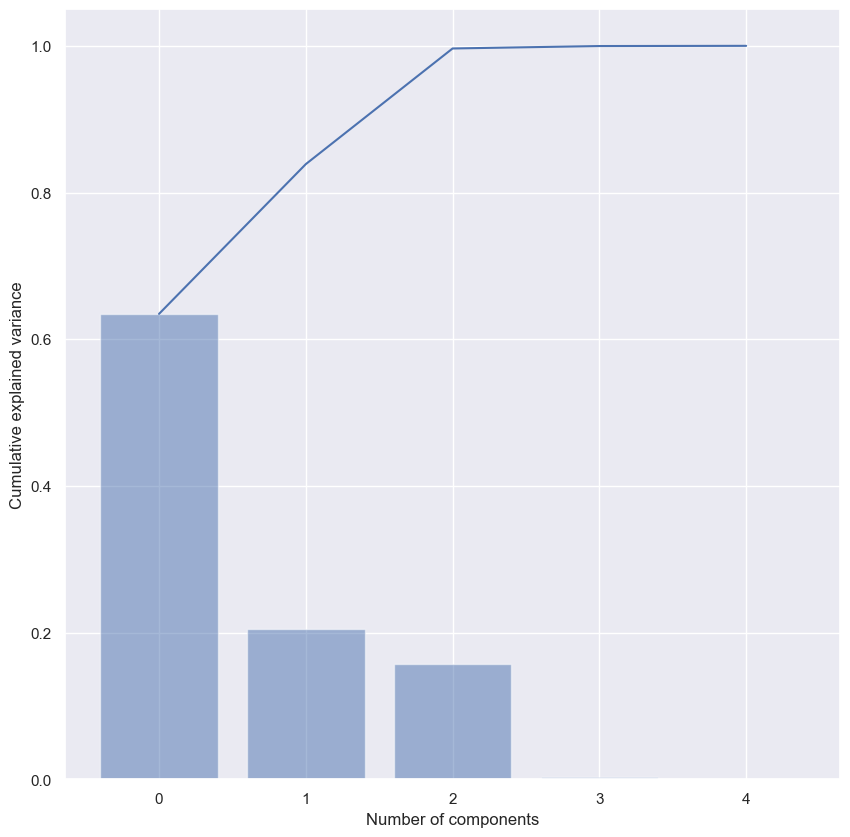

In [383]:
#Explained variance
ell = pca.explained_variance_ratio_
plt. figure()
plt.figure(figsize=(10, 10))
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

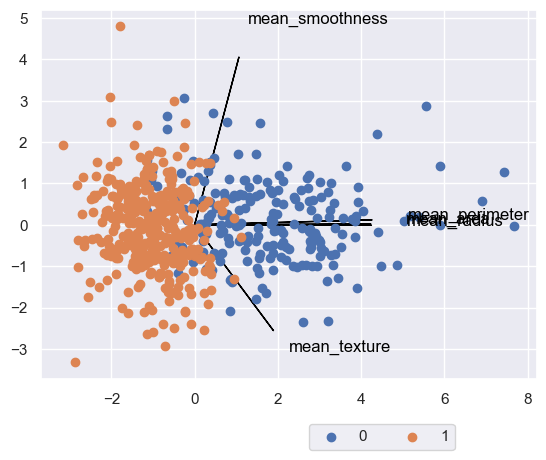

In [384]:
#Biplot
A1 = A[:,0] 
A2 = A[:,1]
A3 = A[:,2]
Z1 = Z[:,0] 
Z2 = Z[:,1]
Z3 = Z[:,2]

fig, ax = plt.subplots()

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    ax.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='black', width=0.00005, head_width=0.0025)
    ax.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2, variables[i], color='black')

for i in data['diagnosis'].unique():

  ax.scatter(Z1[data['diagnosis']==i], Z2[data['diagnosis']==i], marker='o',label=str(i))
 
legend = ax.legend(shadow=False, ncol=3, bbox_to_anchor=(0.85, -0.1))

plt.show()


Text(0.5, 1.0, '\n\nPrincipal components')

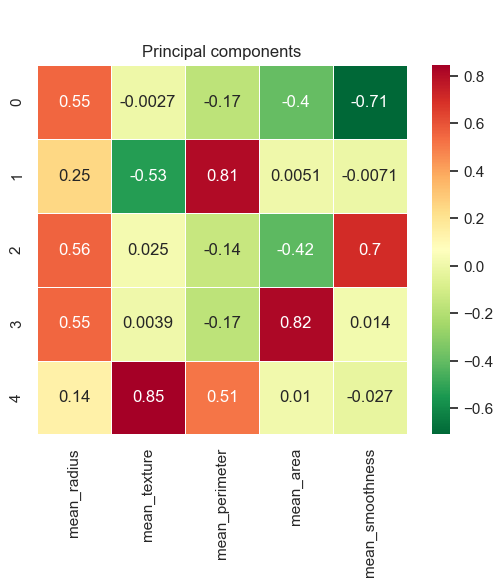

In [385]:

comps = pd.DataFrame(A,columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.title('\n\nPrincipal components')

In [386]:
Z

array([[ 1.56070354e+00,  2.46230573e+00, -1.41119440e+00,
        -1.59038032e-01,  1.00204498e-01],
       [ 2.79860112e+00, -4.65863738e-01, -1.59952076e+00,
         1.12754412e-01, -6.07855545e-02],
       [ 2.84626328e+00,  5.93114938e-01,  8.57757803e-02,
        -3.44589990e-04, -2.66439236e-02],
       ...,
       [ 1.46857744e+00, -1.78342822e+00,  9.02525293e-01,
        -8.77597864e-02, -8.73875526e-03],
       [ 3.86212465e+00,  9.39159699e-02,  1.77040511e+00,
        -1.17511829e-01,  5.55360367e-02],
       [-2.88094480e+00, -3.32510068e+00,  1.93421971e-01,
         3.52948937e-01,  6.48939507e-02]])

In [387]:
#TRAINING THE ORIGINAL DATA WITH Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.43, random_state=42)

In [388]:
#TRAINING THE ORIGINAL DATASET WITH Decision Tree
classifier = DecisionTreeClassifier(random_state=0)
fit2 = classifier.fit(X_train, y_train)




 -------- Classification Report and Accuracy Score of the Machine Learning Model on the Original Dataset -------- 


              precision    recall  f1-score   support

           0       0.80      0.91      0.85        86
           1       0.95      0.87      0.91       159

    accuracy                           0.89       245
   macro avg       0.87      0.89      0.88       245
weighted avg       0.89      0.89      0.89       245

Accuracy of ML Algorithm on the Full Data: 0.8857142857142857


Text(0.5, 1.0, 'Confusion Matrix for the ML algorithm on the Original Dataset')

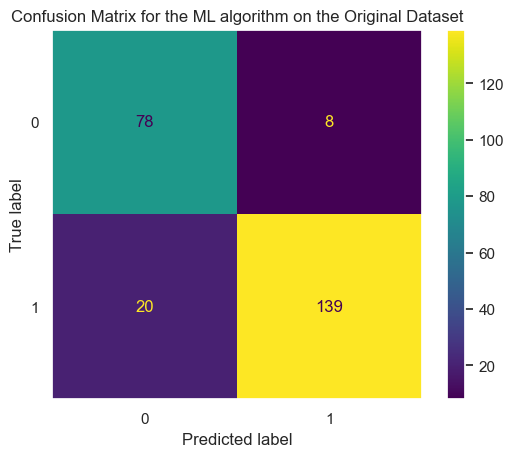

In [389]:
### GENERATING CLASSIFICATION REPORT & CONFUSION MATRICS ON FULL DATA ###
print('\n\n\n -------- Classification Report and Accuracy Score of the Machine Learning Model on the Original Dataset -------- \n\n')
from sklearn.metrics import confusion_matrix,classification_report
fit2 = classifier.fit(X_train, y_train)
y_pred = fit2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
#print(cm) 
print(cr) #printing classification report
print("Accuracy of ML Algorithm on the Full Data:",accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
target_names = ['Donot Have Cancer', 'Have Cancer']
labels_names = [0,1] 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fit2.classes_)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for the ML algorithm on the Original Dataset')

In [390]:
### GENERATING CLASSIFICATION REPORT & CONFUSION MATRICS ON DATA GENERATED BY PCA ###

Z_train, Z_test, yz_train, yz_test = train_test_split(Z, Y, test_size=0.53, random_state=42)










 -------- Classification Report and Accuracy Score of the Machine Learning Model on the Data Obtained from PCA analysis -------- 


              precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.94      0.91      0.93       198

    accuracy                           0.91       302
   macro avg       0.89      0.90      0.90       302
weighted avg       0.91      0.91      0.91       302

Accuracy of PCA Data: 0.9072847682119205





Text(0.5, 1.0, 'Confusion Matrix for the ML algorithm on the Data generated after PCA analysis')

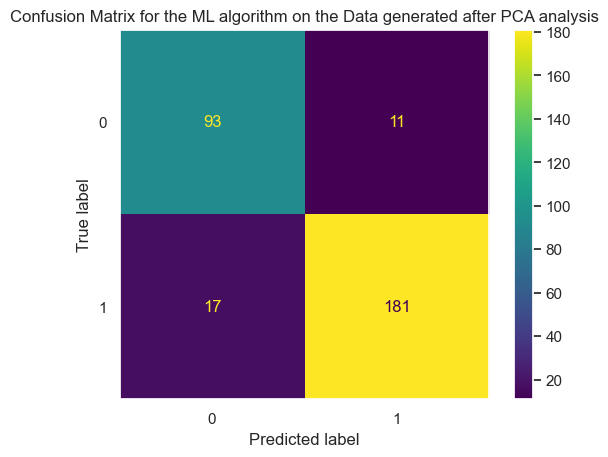

In [391]:
print("\n\n\n\n\n")
### GENERATING CLASSIFICATION REPORT & CONFUSION MATRICS ON DATA GENERATED BY PCA ###
print('\n\n\n -------- Classification Report and Accuracy Score of the Machine Learning Model on the Data Obtained from PCA analysis -------- \n\n')
fit2 = classifier.fit(Z_train, yz_train)
yy_pred = fit2.predict(Z_test)
cm1 = confusion_matrix(yz_test, yy_pred)
cr1 = classification_report(yz_test, yy_pred, )
#print(cm1)
print(cr1)
print("Accuracy of PCA Data:",accuracy_score(yz_test, yy_pred))
print("\n\n")
target_names = ['Donot Have Cancer', 'Have Cancer']
labels_names = [0,1] 
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=fit2.classes_)
disp.plot()
plt.grid(False)
plt.title('Confusion Matrix for the ML algorithm on the Data generated after PCA analysis')